In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sbn
import plotly.express as px
import folium
import plotly.graph_objects as go

In [73]:
data=pd.read_csv('assistance_university.csv')
data.head(-10)

ASSISTANCE_YEAR  ASSISTANCE_TERM  \
0                 2020                1   
1                 2020                1   
2                 2020                1   
3                 2019                1   
4                 2020                1   
...                ...              ...   
27514             2020                1   
27515             2019                2   
27516             2019                2   
27517             2020                1   
27518             2020                1   

                                     UNIVERSITY  AGE      COUNTY  \
0                             Uşak Üniversitesi   23    BAĞCILAR   
1      Isparta Uygulamalı Bilimler Üniversitesi   22    ÜMRANİYE   
2       Mimar Sinan Güzel Sanatlar Üniversitesi   22      PENDİK   
3                            Sinop Üniversitesi   19  ARNAVUTKÖY   
4                   Afyon Kocatepe Üniversitesi   21    ESENYURT   
...                                         ...  ...         ...   
27514                 Bursa Uludağ Üniversitesi   22     ESENLER   
27515                 Bursa Uludağ Üniversitesi   19  BAŞAKŞEHİR   
27516             Sivas Cumhuriyet Üniversitesi   21  SANCAKTEPE   
27517                    Kadir Has Üniversitesi   23  BEYLİKDÜZÜ   
27518           Kütahya Dumlupınar Üniversitesi   20  SULTANGAZİ   

       NUMBER_OF_STUDENTS  
0                       2  
1                       1  
2                       1  
3                       1  
4                       4  
...                   ...  
27514                   6  
27515                   2  
27516                   2  
27517                   1  
27518                   2  

[27519 rows x 6 columns]

In [74]:
data["NUMBER_OF_STUDENTS"].sum()

63071

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27529 entries, 0 to 27528
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ASSISTANCE_YEAR     27529 non-null  int64 
 1   ASSISTANCE_TERM     27529 non-null  int64 
 2   UNIVERSITY          27529 non-null  object
 3   AGE                 27529 non-null  int64 
 4   COUNTY              27529 non-null  object
 5   NUMBER_OF_STUDENTS  27529 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ MB


In [76]:
print(data.isnull().sum())#veritabınımızda boş olan yerleri

ASSISTANCE_YEAR       0
ASSISTANCE_TERM       0
UNIVERSITY            0
AGE                   0
COUNTY                0
NUMBER_OF_STUDENTS    0
dtype: int64


In [77]:
data.describe().T

count         mean       std     min     25%     50%  \
ASSISTANCE_YEAR     27529.0  2019.453050  0.497800  2019.0  2019.0  2019.0   
ASSISTANCE_TERM     27529.0     1.282248  0.450101     1.0     1.0     1.0   
AGE                 27529.0    21.114352  1.786074    17.0    20.0    21.0   
NUMBER_OF_STUDENTS  27529.0     2.291075  3.058702     1.0     1.0     1.0   

                       75%     max  
ASSISTANCE_YEAR     2020.0  2020.0  
ASSISTANCE_TERM        2.0     2.0  
AGE                   22.0    26.0  
NUMBER_OF_STUDENTS     2.0    82.0

In [78]:
data.shape

(27529, 6)

In [79]:
fig = go.Figure(data=go.Scatter3d(
    x=data['ASSISTANCE_TERM'],
    y=data['NUMBER_OF_STUDENTS'],
    z=data['ASSISTANCE_YEAR'],
    text=data['COUNTY'],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=25,
        size=data['ASSISTANCE_YEAR'],
        color = data['ASSISTANCE_YEAR'],
        colorscale = 'Viridis',
        colorbar_title = 'ASSISTANCE_YEAR',
        line_color='rgb(140, 140, 170)'
    )
))


fig.update_layout(height=800, width=800,
                  title='İstanbul B.B Verilerine Göre Burs Verilen Yıl Sayısı')

fig.show()

In [80]:
B=data.groupby(["UNIVERSITY"])[["NUMBER_OF_STUDENTS"]].sum().head(280)

In [81]:
B=B.reset_index()

In [82]:
b=B.sort_values(by='UNIVERSITY', ascending=True)
b

UNIVERSITY  NUMBER_OF_STUDENTS
0                            Abdullah Gül Üniversitesi                  20
1            Acıbadem Mehmet Ali Aydınlar Üniversitesi                  55
2    Adana Alparslan Türkeş Bilim Ve Teknoloji Üniv...                  14
3                                Adıyaman Üniversitesi                  45
4                          Afyon Kocatepe Üniversitesi                 205
..                                                 ...                 ...
203                       İzmir Demokrasi Üniversitesi                  61
204                         İzmir Ekonomi Üniversitesi                   3
205                    İzmir Katip Çelebi Üniversitesi                 128
206                   İzmir Yüksek Teknoloji Enstitüsü                  36
207                                Şırnak Üniversitesi                   9

[208 rows x 2 columns]

In [83]:
b["NUMBER_OF_STUDENTS"].sum()

63071

In [84]:
A=data.groupby(["COUNTY"])[["NUMBER_OF_STUDENTS"]].sum().head(39)

In [85]:
A=A.reset_index()

In [86]:
a=A.sort_values(by='COUNTY', ascending=True)
a

COUNTY  NUMBER_OF_STUDENTS
0          ADALAR                  26
1      ARNAVUTKÖY                1687
2        ATAŞEHİR                1281
3         AVCILAR                1721
4    BAHÇELİEVLER                3024
5        BAKIRKÖY                 309
6      BAYRAMPAŞA                1041
7        BAĞCILAR                4055
8      BAŞAKŞEHİR                1710
9          BEYKOZ                 725
10     BEYLİKDÜZÜ                1212
11        BEYOĞLU                 790
12       BEŞİKTAŞ                 217
13   BÜYÜKÇEKMECE                 888
14        ESENLER                2663
15       ESENYURT                3678
16           EYÜP                   4
17     EYÜPSULTAN                1320
18          FATİH                1876
19  GAZİOSMANPAŞA                2111
20       GÜNGÖREN                1538
21        KADIKÖY                 737
22         KARTAL                2110
23      KAĞITHANE                1916
24   KÜÇÜKÇEKMECE                3009
25        MALTEPE                1941
26         PENDİK                3395
27     SANCAKTEPE                2393
28        SARIYER                 813
29    SULTANBEYLİ                2420
30     SULTANGAZİ                2975
31        SİLİVRİ                 536
32          TUZLA                1086
33    ZEYTİNBURNU                1501
34        ÇATALCA                 247
35       ÇEKMEKÖY                 938
36       ÜMRANİYE                2529
37        ÜSKÜDAR                1910
38           ŞİLE                  90

In [87]:
fig = px.pie(a, values='NUMBER_OF_STUDENTS', names='COUNTY', title='İlçelere Göre Burs Verilen Öğrenci Sayısı',
            hover_data=['NUMBER_OF_STUDENTS'], labels={'COUNTY':'COUNTY'})
fig.show()

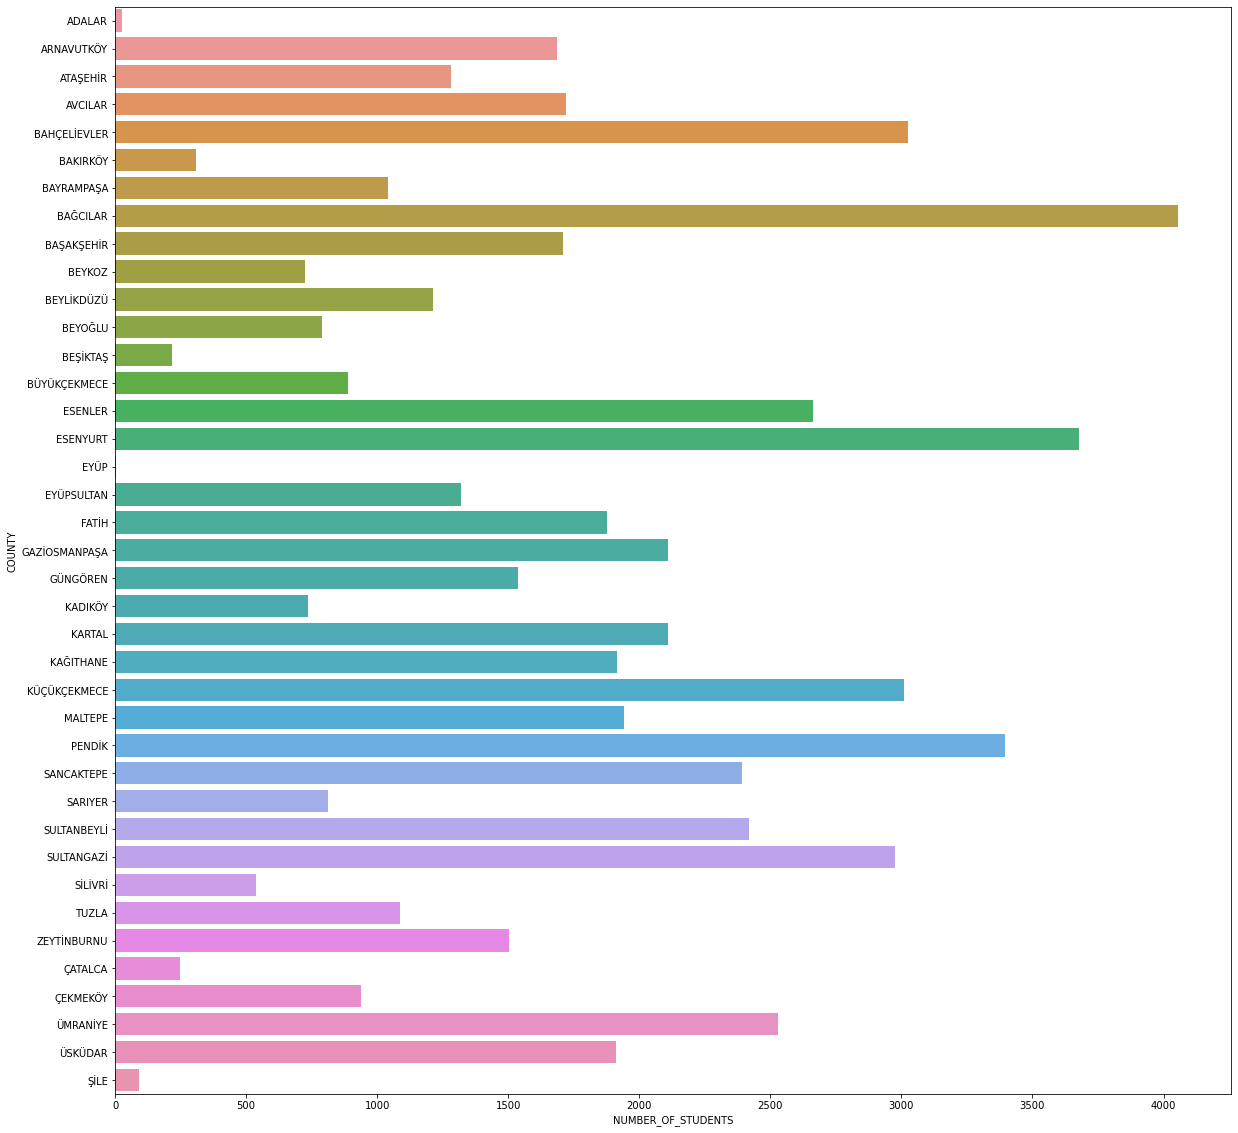

In [88]:
plt.figure(figsize=(20,20))
sbn.barplot(y="COUNTY", x="NUMBER_OF_STUDENTS", data=a);

In [89]:
C=data.groupby(["ASSISTANCE_YEAR"])[["NUMBER_OF_STUDENTS"]].sum().head(280)
C=C.reset_index()
c=C.sort_values(by='ASSISTANCE_YEAR', ascending=True)
c

ASSISTANCE_YEAR  NUMBER_OF_STUDENTS
0             2019               29422
1             2020               33649

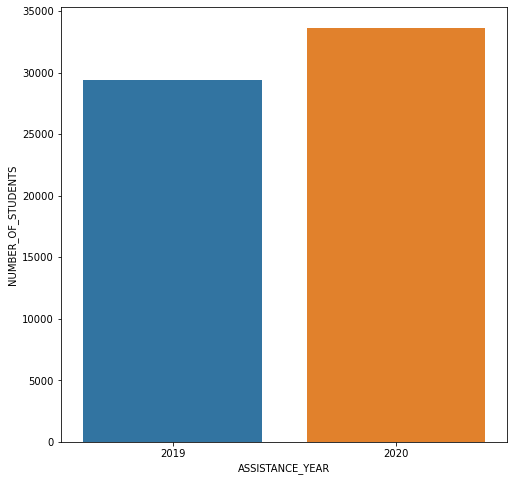

In [90]:
plt.figure(figsize=(8,8))
sbn.barplot(x="ASSISTANCE_YEAR", y="NUMBER_OF_STUDENTS", data=c);

In [91]:
yer=pd.read_excel('yer.xlsx')
yer.head(39)

COUNTY      ENLEM     BOYLAM
0          ADALAR  40.863953  29.126049
1      ARNAVUTKÖY  41.200440  28.735415
2        ATAŞEHİR  40.984279  29.142242
3         AVCILAR  41.037607  28.719335
4    BAHÇELİEVLER  41.009755  28.845325
5        BAKIRKÖY  40.980825  28.835047
6      BAYRAMPAŞA  41.051476  28.901214
7        BAĞCILAR  41.044889  28.840329
8      BAŞAKŞEHİR  41.103645  28.731555
9          BEYKOZ  41.138331  29.214582
10     BEYLİKDÜZÜ  40.987968  28.646972
11        BEYOĞLU  41.043048  28.967379
12       BEŞİKTAŞ  41.071607  29.023462
13   BÜYÜKÇEKMECE  41.057115  28.512902
14        ESENLER  41.076536  28.857053
15       ESENYURT  41.048805  28.661213
16           EYÜP  41.045887  28.936846
17     EYÜPSULTAN  41.045800  28.936700
18          FATİH  41.014260  28.953554
19  GAZİOSMANPAŞA  41.074166  28.906792
20      GÜNGÖREN   41.019930  28.879699
21        KADIKÖY  40.981133  29.063053
22         KARTAL  40.921527  29.196744
23      KAĞITHANE  41.082934  28.978784
24   KÜÇÜKÇEKMECE  41.020690  28.780362
25        MALTEPE  40.943936  29.155544
26         PENDİK  40.944932  29.360990
27     SANCAKTEPE  40.999384  29.272476
28        SARIYER  41.172080  29.024297
29    SULTANBEYLİ  40.968330  29.278314
30     SULTANGAZİ  41.107402  28.859995
31        SİLİVRİ  41.071946  28.200803
32          TUZLA  40.891667  29.355203
33    ZEYTİNBURNU  41.005160  28.909220
34        ÇATALCA  41.145772  28.461587
35       ÇEKMEKÖY  41.072825  29.269752
36       ÜMRANİYE  41.027255  29.138752
37        ÜSKÜDAR  41.035249  29.047694
38           ŞİLE  41.166489  29.597718

In [92]:
data=pd.merge(a,yer)
df=data.copy()
df.head()

COUNTY  NUMBER_OF_STUDENTS      ENLEM     BOYLAM
0        ADALAR                  26  40.863953  29.126049
1    ARNAVUTKÖY                1687  41.200440  28.735415
2      ATAŞEHİR                1281  40.984279  29.142242
3       AVCILAR                1721  41.037607  28.719335
4  BAHÇELİEVLER                3024  41.009755  28.845325

In [93]:
locations = df[['ENLEM', 'BOYLAM']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[41.0448895, 28.8403287]

In [94]:
from folium import plugins
m = folium.Map(location=(42, 29), zoom_start=5)
 
minimap = plugins.MiniMap()
m.add_child(minimap)
m

In [95]:
m = folium.Map([42 ,29], zoom_start=5,width="%100",height="%100")
location=df[["ENLEM","BOYLAM"]]

plugins.MarkerCluster(location).add_to(m)

m

In [96]:
m = folium.Map([42 ,29], zoom_start=5,width="%100",height="%100")
locations = list(zip(df.ENLEM, df.BOYLAM))
cluster = plugins.MarkerCluster(locations=locations,                     
               popups=df["COUNTY"].tolist()+df["NUMBER_OF_STUDENTS"].tolist()) #ilçe adlarını görmek için.
m.add_child(cluster)
m

In [97]:
m1 = folium.Map(location=(42, 29), zoom_start=8)
for index, df1 in df.iterrows():
    location = [df1['ENLEM'], df1['BOYLAM']]
    folium.Marker(location, popup = f'İlçe:{df1["COUNTY"]}\n Öğrenci Sayısı:{df1["NUMBER_OF_STUDENTS"]}').add_to(m1)
m1

In [98]:
df=df[["ENLEM","BOYLAM","NUMBER_OF_STUDENTS"]]

min_price=df["NUMBER_OF_STUDENTS"].min()

max_price=df["NUMBER_OF_STUDENTS"].max()

In [99]:
m = folium.Map(location=[41,29],width="%100",height="%100")
for i in range(len(locations)):
    folium.CircleMarker(location=locations[i],radius=10).add_to(m)
m

In [100]:
df["NUMBER_OF_STUDENTS"].describe().to_frame()

NUMBER_OF_STUDENTS
count           38.000000
mean          1602.210526
std           1068.010708
min              4.000000
25%            795.750000
50%           1594.000000
75%           2322.500000
max           4055.000000

In [101]:
import branca.colormap as cm
m = folium.Map(location=[41,29],width="%100",height="%100")
colormap = cm.StepColormap(colors=['blue','green','orange','red'] ,#renkler
                           index=[4,796,1594,2322,4055], #eşik değerler
                           vmin= 4,
                           vmax=4055)

for loc, p in zip(zip(df["ENLEM"],df["BOYLAM"]),df["NUMBER_OF_STUDENTS"]):
      folium.Circle(
      location=loc,
      radius=100, #yarıçap
      fill=True, #içi dolu çember
      color=colormap(p)

).add_to(m)

m

In [102]:
#ısı grafiği
heat_data = df.groupby(["ENLEM","BOYLAM"])['NUMBER_OF_STUDENTS'].mean().reset_index().values.tolist()  
folium.plugins.HeatMap(heat_data).add_to(m)
m

In [103]:
b

UNIVERSITY  NUMBER_OF_STUDENTS
0                            Abdullah Gül Üniversitesi                  20
1            Acıbadem Mehmet Ali Aydınlar Üniversitesi                  55
2    Adana Alparslan Türkeş Bilim Ve Teknoloji Üniv...                  14
3                                Adıyaman Üniversitesi                  45
4                          Afyon Kocatepe Üniversitesi                 205
..                                                 ...                 ...
203                       İzmir Demokrasi Üniversitesi                  61
204                         İzmir Ekonomi Üniversitesi                   3
205                    İzmir Katip Çelebi Üniversitesi                 128
206                   İzmir Yüksek Teknoloji Enstitüsü                  36
207                                Şırnak Üniversitesi                   9

[208 rows x 2 columns]

In [104]:
from folium import GeoJson
geo=r"tr-cities.json"
file = open(geo, encoding="utf8")
text = file.read()

m = folium.Map(width="%100",weight="%100")

GeoJson(text).add_to(m)
m

In [105]:
m = folium.Map(tiles="Cartodbdark_matter",width="%100",weight="%100")

GeoJson(text,).add_to(m)

m

In [106]:
uniler=pd.read_excel('uniler.xlsx')
uniler.head()

UNIVERSITY     Sehir
0                         Çukurova Üniversitesi     Adana
1                         Adıyaman Üniversitesi  Adıyaman
2                   Afyon Kocatepe Üniversitesi     Afyon
3  Afyonkarahisar Sağlık Bilimleri Üniversitesi     Afyon
4               Ağrı İbrahim Çeçen Üniversitesi      Ağrı

In [107]:
uniler=uniler.sort_values(by='UNIVERSITY', ascending=True)
uniler

UNIVERSITY     Sehir
138                     Abdullah Gül Üniversitesi   Kayseri
83                          Acıbadem Üniversitesi  İstanbul
1                           Adıyaman Üniversitesi  Adıyaman
2                     Afyon Kocatepe Üniversitesi     Afyon
3    Afyonkarahisar Sağlık Bilimleri Üniversitesi     Afyon
..                                            ...       ...
129                   İzmir Bakırçay Üniversitesi     İzmir
130                  İzmir Demokrasi Üniversitesi     İzmir
128               İzmir Kâtip Çelebi Üniversitesi     İzmir
127              İzmir Yüksek Teknoloji Enstitüsü     İzmir
178                           Şırnak Üniversitesi    Şırnak

[191 rows x 2 columns]

In [108]:
b

UNIVERSITY  NUMBER_OF_STUDENTS
0                            Abdullah Gül Üniversitesi                  20
1            Acıbadem Mehmet Ali Aydınlar Üniversitesi                  55
2    Adana Alparslan Türkeş Bilim Ve Teknoloji Üniv...                  14
3                                Adıyaman Üniversitesi                  45
4                          Afyon Kocatepe Üniversitesi                 205
..                                                 ...                 ...
203                       İzmir Demokrasi Üniversitesi                  61
204                         İzmir Ekonomi Üniversitesi                   3
205                    İzmir Katip Çelebi Üniversitesi                 128
206                   İzmir Yüksek Teknoloji Enstitüsü                  36
207                                Şırnak Üniversitesi                   9

[208 rows x 2 columns]

In [109]:
data=pd.merge(b,uniler)
df2=data.copy()
df2.head(71)

UNIVERSITY  NUMBER_OF_STUDENTS     Sehir
0                      Abdullah Gül Üniversitesi                  20   Kayseri
1                          Adıyaman Üniversitesi                  45  Adıyaman
2                    Afyon Kocatepe Üniversitesi                 205     Afyon
3   Afyonkarahisar Sağlık Bilimleri Üniversitesi                  28     Afyon
4                           Akdeniz Üniversitesi                 435   Antalya
..                                           ...                 ...       ...
66      Isparta Uygulamalı Bilimler Üniversitesi                  72   Isparta
67                            Iğdır Üniversitesi                  19     Iğdır
68                             Işık Üniversitesi                  84  İstanbul
69                        Kadir Has Üniversitesi                  75  İstanbul
70                           Kafkas Üniversitesi                  79      Kars

[71 rows x 3 columns]

In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   UNIVERSITY          169 non-null    object
 1   NUMBER_OF_STUDENTS  169 non-null    int64 
 2   Sehir               169 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.3+ KB


In [111]:
print(df2.isnull().sum())#veritabınımızda boş olan yerleri

UNIVERSITY            0
NUMBER_OF_STUDENTS    0
Sehir                 0
dtype: int64


In [112]:
df2.head(60)

UNIVERSITY  NUMBER_OF_STUDENTS  \
0                      Abdullah Gül Üniversitesi                  20   
1                          Adıyaman Üniversitesi                  45   
2                    Afyon Kocatepe Üniversitesi                 205   
3   Afyonkarahisar Sağlık Bilimleri Üniversitesi                  28   
4                           Akdeniz Üniversitesi                 435   
5                           Aksaray Üniversitesi                 104   
6          Alanya Alaaddin Keykubat Üniversitesi                 104   
7        Alanya Hamdullah Emin Paşa Üniversitesi                   3   
8                          Altınbaş Üniversitesi                 206   
9                            Amasya Üniversitesi                 119   
10                          Anadolu Üniversitesi                 263   
11          Ankara Hacı Bayram Veli Üniversitesi                 112   
12                   Ankara Medipol Üniversitesi                   1   
13           Ankara Sosyal Bilimler Üniversitesi                  10   
14          Ankara Yıldırım Beyazıt Üniversitesi                 122   
15                           Ankara Üniversitesi                 201   
16                    Antalya Bilim Üniversitesi                   1   
17                          Ardahan Üniversitesi                  16   
18                     Artvin Çoruh Üniversitesi                  87   
19                          Atatürk Üniversitesi                 470   
20                           Atılım Üniversitesi                   3   
21                          Avrasya Üniversitesi                   7   
22                          Aydın Adnan Menderes                 436   
23               Ağrı İbrahim Çeçen Üniversitesi                  44   
24                       Bahçeşehir Üniversitesi                 172   
25                        Balıkesir Üniversitesi                 559   
26                           Bartın Üniversitesi                 329   
27                           Batman Üniversitesi                  25   
28                          Bayburt Üniversitesi                  91   
29                          Başkent Üniversitesi                   5   
30                          Beykent Üniversitesi                 327   
31                           Beykoz Üniversitesi                 115   
32             Bilecik Şeyh Edebali Üniversitesi                 563   
33                           Bingöl Üniversitesi                  56   
34                           Biruni Üniversitesi                 221   
35                      Bitlis Eren Üniversitesi                  19   
36          Bolu Abant İzzet Baysal Üniversitesi                 962   
37                         Boğaziçi Üniversitesi                 434   
38         Burdur Mehmet Akif Ersoy Üniversitesi                 242   
39                     Bursa Teknik Üniversitesi                 151   
40                     Bursa Uludağ Üniversitesi                1131   
41                  Demiroğlu Bilim Üniversitesi                  72   
42                            Dicle Üniversitesi                 121   
43                      Dokuz Eylül Üniversitesi                 581   
44                            Doğuş Üniversitesi                 131   
45                            Düzce Üniversitesi                1396   
46                          Erciyes Üniversitesi                 232   
47         Erzincan Binali Yıldırım Üniversitesi                 138   
48                   Erzurum Teknik Üniversitesi                  55   
49              Eskişehir Osmangazi Üniversitesi                 280   
50                 Eskişehir Teknik Üniversitesi                 174   
51                       Fenerbahçe Üniversitesi                  71   
52                            Fırat Üniversitesi                 169   
53                      Galatasaray Üniversitesi                 105   
54                             Gazi Üniversitesi                 170   
55    

In [113]:
m = folium.Map([42 ,29],tiles="Cartodb Positron", zoom_start=5,width="%100",height="%100")
folium.Choropleth(
    geo_data=text,
    data=df2,
    columns=['Sehir', 'NUMBER_OF_STUDENTS'],   
    legend_name='Şehirlere göre verilen burs',
    key_on='feature.properties.name'
#‘feature.id’ ya da ‘feature.properties.statename’ de olabilir.
    ).add_to(m)

m

In [114]:
#Şehirlerdeki tüm üniversitelerin toplam öğrenci sayısına göre grupladım(sum ile öğrenciler toplandı)
G=df2.groupby(["Sehir"])[["NUMBER_OF_STUDENTS"]].sum().head(82)
G=G.reset_index()
g=G.sort_values(by='Sehir', ascending=True)
g

Sehir  NUMBER_OF_STUDENTS
0       Adana                  86
1    Adıyaman                  45
2       Afyon                 233
3     Aksaray                 104
4      Amasya                 119
..        ...                 ...
76      Çorum                 120
77   İstanbul               27506
78      İzmir                 733
79  Şanlıurfa                  39
80     Şırnak                   9

[81 rows x 2 columns]

In [115]:
g["NUMBER_OF_STUDENTS"].sum()

61135